In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import missingno as msno
import re
import seaborn as sns
import random

In [2]:
!pip install missingno

In [3]:
# Load and open csv file using pandas

database = pd.read_csv("Uncleaned_DS_jobs.csv")

In [4]:
# Print first 5 rows of the file

database.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [5]:
# Print the last 5 of the file

database.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1
671,671,Data Scientist,$105K-$167K (Glassdoor est.),Description\n\nThe Data Scientist will be part...,2.7,1-800-Flowers\n2.7,"New York, NY","Carle Place, NY",1001 to 5000 employees,1976,Company - Public,Wholesale,Business Services,$1 to $2 billion (USD),-1


In [6]:
# Describing  the file

database.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


In [7]:
# Generating the shape of the file 

database.shape

(672, 15)

In [8]:
# Generate the datatype to check the datatype each column have 

database.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [9]:
# Creating a copy of the dataframe

df = database.copy()

In [10]:
# Deleting dupicated index

df.set_index("index", inplace = True)

In [11]:
# Changing the datatype of Salary Estimate from object to category
# Stripping (Glassdoor est. and Employer est.) 

cleaning_salary = df["Salary Estimate"].str.strip(("(Employer est.)(Glassdoor est.))")).astype("category")
cleaning_salary.dtype

CategoricalDtype(categories=['$101K-$165K', '$105K-$167K', '$110K-$163K', '$112K-$116K',
                  '$122K-$146K', '$124K-$198K', '$128K-$201K', '$137K-$171K',
                  '$138K-$158K', '$141K-$225K', '$145K-$225K', '$212K-$331K',
                  '$31K-$56K', '$56K-$97K', '$66K-$112K', '$69K-$116K',
                  '$71K-$123K', '$75K-$131K', '$79K-$106K', '$79K-$131K',
                  '$79K-$133K', '$79K-$147K', '$80K-$132K', '$87K-$141K',
                  '$90K-$109K', '$90K-$124K', '$91K-$150K', '$92K-$155K',
                  '$95K-$119K', '$99K-$132K'],
, ordered=False)

In [12]:
# Replacing the cleaning_salary into the dataframe

df["Salary Estimate"] = cleaning_salary
df["Salary Estimate"]

index
0      $137K-$171K
1      $137K-$171K
2      $137K-$171K
3      $137K-$171K
4      $137K-$171K
          ...     
667    $105K-$167K
668    $105K-$167K
669    $105K-$167K
670    $105K-$167K
671    $105K-$167K
Name: Salary Estimate, Length: 672, dtype: category
Categories (30, object): ['$101K-$165K', '$105K-$167K', '$110K-$163K', '$112K-$116K', ..., '$91K-$150K', '$92K-$155K', '$95K-$119K', '$99K-$132K']

In [13]:
# Generating the total number of Companies

company_name = [df["Company Name"].unique()]
pd.DataFrame(company_name).transpose()

,0
0,Healthfirst\n3.1
1,ManTech\n4.2
2,Analysis Group\n3.8
3,INFICON\n3.5
4,Affinity Solutions\n2.9
...,...
427,Foundation Medicine\n4.0
428,TRANZACT\n3.6
429,JKGT
430,AccessHope


In [14]:
# Cleaning the company column

split_company_name = df["Company Name"].str.split('\n').str[0]
clean_names = split_company_name
clean_names

index
0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 672, dtype: object

In [15]:
# Adding to the dataframe

df["Company Name"] = clean_names

In [16]:
df["Company Name"]

index
0               Healthfirst
1                   ManTech
2            Analysis Group
3                   INFICON
4        Affinity Solutions
               ...         
667                TRANZACT
668                    JKGT
669              AccessHope
670    ChaTeck Incorporated
671           1-800-Flowers
Name: Company Name, Length: 672, dtype: object

In [17]:
# Cleaning Job Description

cleaning_jd = df["Job Description"].str.replace("\n", " ")
cleaning_jd

index
0      Description  The Senior Data Scientist is resp...
1      Secure our Nation, Ignite your Future  Join th...
2      Overview   Analysis Group is one of the larges...
3      JOB DESCRIPTION:  Do you have a passion for Da...
4      Data Scientist Affinity Solutions / Marketing ...
                             ...                        
667    Summary  We’re looking for a data scientist to...
668    Job Description Become a thought leader within...
669    Join a thriving company that is changing the w...
670    100 Remote Opportunity As an AINLP Data Scient...
671    Description  The Data Scientist will be part o...
Name: Job Description, Length: 672, dtype: object

In [18]:
# Adding cleaned Job Description to the dataframe

df["Job Description"] = cleaning_jd

In [19]:
# Checking dataframe Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job Title          672 non-null    object  
 1   Salary Estimate    672 non-null    category
 2   Job Description    672 non-null    object  
 3   Rating             672 non-null    float64 
 4   Company Name       672 non-null    object  
 5   Location           672 non-null    object  
 6   Headquarters       672 non-null    object  
 7   Size               672 non-null    object  
 8   Founded            672 non-null    int64   
 9   Type of ownership  672 non-null    object  
 10  Industry           672 non-null    object  
 11  Sector             672 non-null    object  
 12  Revenue            672 non-null    object  
 13  Competitors        672 non-null    object  
dtypes: category(1), float64(1), int64(1), object(11)
memory usage: 75.4+ KB


In [20]:
# Checking for duplicates

duplicates = df.duplicated(keep = False)
duplicates

index
0      False
1      False
2      False
3      False
4      False
       ...  
667    False
668    False
669    False
670    False
671    False
Length: 672, dtype: bool

In [21]:
# Generating the duplicate values

duplicated_values = df[duplicates].sort_values("Job Title")

In [22]:
duplicated_values

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
361,Data Scientist,$122K-$146K,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
498,Data Scientist,$95K-$119K,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
497,Data Scientist,$95K-$119K,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
496,Data Scientist,$95K-$119K,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
495,Data Scientist,$95K-$119K,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
389,Data Scientist,$110K-$163K,"Job Description As a Data Scientist, you will ...",-1.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
388,Data Scientist,$110K-$163K,"Job Description As a Data Scientist, you will ...",-1.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
362,Data Scientist,$122K-$146K,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
500,Data Scientist,$95K-$119K,Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [23]:
# Checking Non-duplicated values

df[~duplicates].sort_values(by = "Job Title")

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
611,(Sr.) Data Scientist -,$87K-$141K,"Thursday, June 11, 2020 Merrick Bank is a top...",3.6,Merrick Bank,Utah,"South Jordan, UT",201 to 500 employees,1997,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
93,(Sr.) Data Scientist -,$79K-$131K,"Thursday, June 11, 2020 Merrick Bank is a top...",3.6,Merrick Bank,Utah,"South Jordan, UT",201 to 500 employees,1997,Company - Private,Banks & Credit Unions,Finance,Unknown / Non-Applicable,-1
143,AI Data Scientist,$90K-$109K,A chance to provide active support to our spon...,3.3,MITRE,"McLean, VA","Bedford, MA",5001 to 10000 employees,1958,Nonprofit Organization,Federal Agencies,Government,$1 to $2 billion (USD),"Battelle, General Atomics, SAIC"
651,AI Ops Data Scientist,$92K-$155K,"Company AstraZeneca is a global, innovation-d...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,1913,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Roche, GlaxoSmithKline, Novartis"
370,AI Ops Data Scientist,$112K-$116K,"Company AstraZeneca is a global, innovation-d...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,1913,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Roche, GlaxoSmithKline, Novartis"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,"VP, Data Science",$31K-$56K,"We are looking for a VP, Data Science to lead ...",3.9,7Park Data,"New York, NY","New York, NY",51 to 200 employees,2012,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1
342,"VP, Data Science",$79K-$147K,"We are looking for a VP, Data Science to lead ...",3.9,7Park Data,"New York, NY","New York, NY",51 to 200 employees,2012,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1
580,"Vice President, Biometrics and Clinical Data M...",$138K-$158K,"At Alector, our mission is to develop therapie...",4.8,Alector,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,2013,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,-1


In [24]:
# Dropping complete duplicates

df.drop_duplicates(keep = "first", ignore_index = True, inplace = True)

In [25]:
# Checking of remaining duplicates

df.duplicated(keep = False).unique()

array([False])

In [26]:
# Finding missing values

data = df.replace((-1, "-1"), np.NaN)

In [27]:
df = data

In [28]:
# Summing the total missing values by column

df.isnull().sum()

Job Title              0
Salary Estimate        0
Job Description        0
Rating                39
Company Name           0
Location               0
Headquarters          20
Size                  16
Founded              107
Type of ownership     16
Industry              60
Sector                60
Revenue               16
Competitors          488
dtype: int64

<AxesSubplot:>

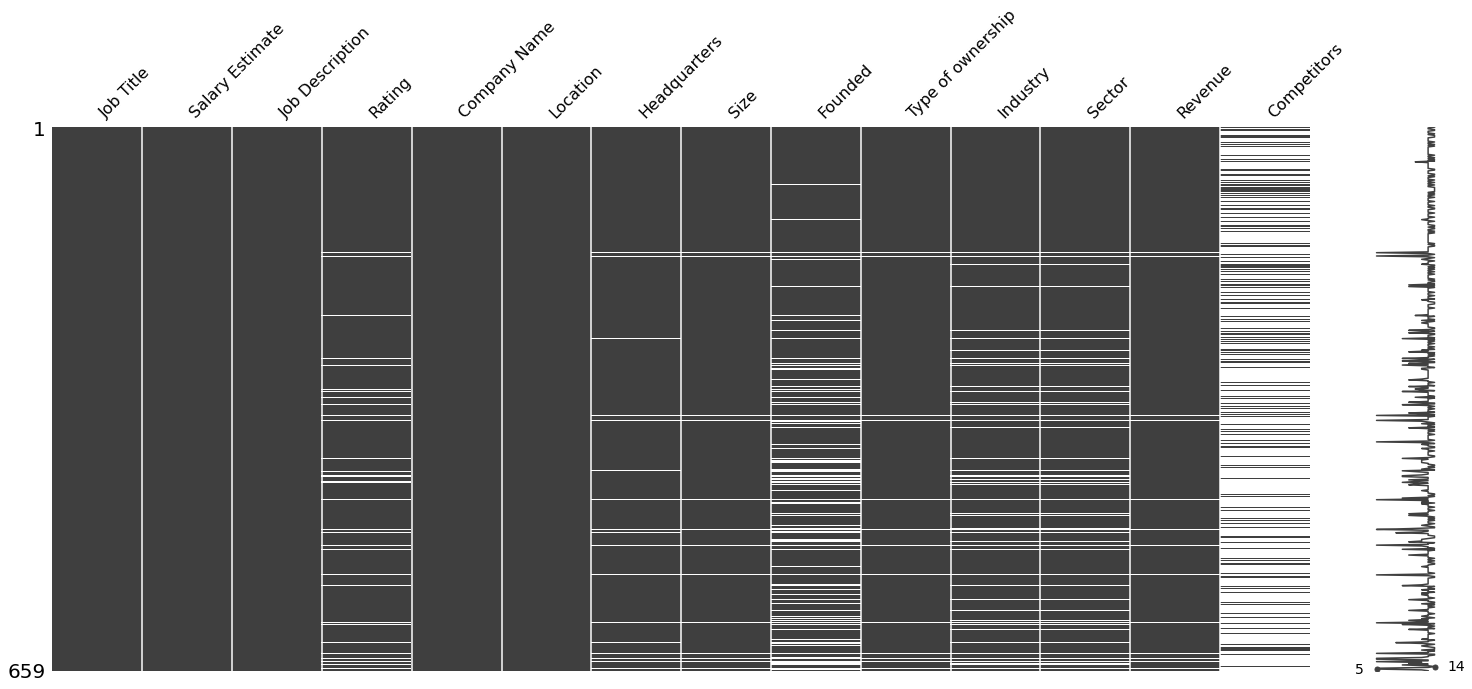

In [29]:
# Ploting the matrix of the missing values

msno.matrix(df, color = (0.25,0.25,0.25))

In [30]:
# Determining the nature of the missing values in Rating column

df["Rating"].describe()

count    620.000000
mean       3.881290
std        0.609805
min        2.000000
25%        3.500000
50%        3.800000
75%        4.400000
max        5.000000
Name: Rating, dtype: float64

C:\Users\EAFrimpong\Music\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\EAFrimpong\Music\anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='Rating'>

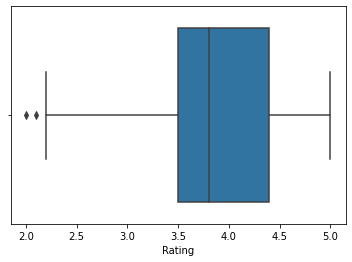

In [31]:
# Dtermining the range constraints

sns.boxplot(df["Rating"],orient = 'v')

In [32]:
# Finding the mean of the Rating column

mean_missing_rating = round(df["Rating"][df["Rating"]!=-1].mean(), 1)
mean_missing_rating

3.9

In [33]:
# Replacing the missing values in with then mean


replace_mean = df["Rating"].fillna(mean_missing_rating)
df["Rating"] = replace_mean

In [34]:
df["Rating"]

0      3.1
1      4.2
2      3.8
3      3.5
4      2.9
      ... 
654    3.6
655    3.9
656    3.9
657    5.0
658    2.7
Name: Rating, Length: 659, dtype: float64

In [35]:
# Finding the modal year

df["Founded"].value_counts()

2012.0    34
2011.0    24
2010.0    22
1996.0    22
1999.0    22
          ..
1820.0     1
1952.0     1
1932.0     1
1894.0     1
1962.0     1
Name: Founded, Length: 102, dtype: int64

In [36]:
# Replacing the missing values with the mode

replacing_founded = df['Founded'].fillna(2012.0)
replacing_founded

0      1993.0
1      1968.0
2      1981.0
3      2000.0
4      1998.0
        ...  
654    1989.0
655    2012.0
656    2012.0
657    2012.0
658    1976.0
Name: Founded, Length: 659, dtype: float64

In [37]:
# Changing datatype to datetime

clean_founded = pd.to_datetime(replacing_founded).dt.strftime("%Y")
clean_founded

0      1970
1      1970
2      1970
3      1970
4      1970
       ... 
654    1970
655    1970
656    1970
657    1970
658    1970
Name: Founded, Length: 659, dtype: object

In [38]:
# Adding to dataframe

df["Founded"] = clean_founded

In [39]:
# Determain the nature of missing values of Headquarters

df["Headquarters"].describe()

count              639
unique             228
top       New York, NY
freq                33
Name: Headquarters, dtype: object

In [40]:
df["Headquarters"]

0                New York, NY
1                 Herndon, VA
2                  Boston, MA
3      Bad Ragaz, Switzerland
4                New York, NY
                ...          
654              Fort Lee, NJ
655                       NaN
656                       NaN
657           Santa Clara, CA
658           Carle Place, NY
Name: Headquarters, Length: 659, dtype: object

In [41]:
# Replacing the missing values with the random sample imputation

available_hq = df["Headquarters"].unique()


In [42]:
random.seed(3)
random_choice = random.choice(available_hq)
random_choice

'Santa Cruz, CA'

In [43]:
replace_hq = df["Headquarters"].fillna(random_choice)
replace_hq

0                New York, NY
1                 Herndon, VA
2                  Boston, MA
3      Bad Ragaz, Switzerland
4                New York, NY
                ...          
654              Fort Lee, NJ
655            Santa Cruz, CA
656            Santa Cruz, CA
657           Santa Clara, CA
658           Carle Place, NY
Name: Headquarters, Length: 659, dtype: object

In [44]:
# Inserting the replace values into the data frame

df["Headquarters"] = replace_hq

In [45]:
# Describe the Size column

df["Size"].describe()

count                     643
unique                      8
top       51 to 200 employees
freq                      134
Name: Size, dtype: object

In [46]:
available_size = df["Size"].unique()
available_size

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', nan, 'Unknown'],
      dtype=object)

In [47]:
#Filing the missing values

replace_size = df["Size"].fillna("Unknown")
replace_size

0       1001 to 5000 employees
1      5001 to 10000 employees
2       1001 to 5000 employees
3        501 to 1000 employees
4          51 to 200 employees
                ...           
654     1001 to 5000 employees
655                    Unknown
656                    Unknown
657          1 to 50 employees
658     1001 to 5000 employees
Name: Size, Length: 659, dtype: object

In [49]:
# Insert replaced valued into dataframe


df["Size"] = replace_size

In [50]:
# Determain the nature of missing values of Type of ownership


df["Type of ownership"].describe()

count                   643
unique                   12
top       Company - Private
freq                    395
Name: Type of ownership, dtype: object

In [51]:
df["Type of ownership"].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', nan,
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [52]:
#Filing the missing values

replace_type_ownership = df["Type of ownership"].fillna("Unknown")
replace_type_ownership

0       Nonprofit Organization
1             Company - Public
2      Private Practice / Firm
3             Company - Public
4            Company - Private
                ...           
654          Company - Private
655                    Unknown
656                    Unknown
657          Company - Private
658           Company - Public
Name: Type of ownership, Length: 659, dtype: object

In [53]:
#Changing datatype

new_type_ownership = replace_type_ownership.astype("category")

In [54]:
# Insert replaced valued into dataframe

df["Type of ownership"] = new_type_ownership

In [55]:
# Determain the nature of missing values of Revenue


df["Revenue"].describe()

count                          643
unique                          13
top       Unknown / Non-Applicable
freq                           212
Name: Revenue, dtype: object

In [56]:
df["Revenue"].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', nan], dtype=object)

In [57]:
#Filing the missing values

replace_revenue = df["Revenue"].fillna("Unknown / Non-Applicable")
replace_revenue

0        Unknown / Non-Applicable
1          $1 to $2 billion (USD)
2      $100 to $500 million (USD)
3      $100 to $500 million (USD)
4        Unknown / Non-Applicable
                  ...            
654      Unknown / Non-Applicable
655      Unknown / Non-Applicable
656      Unknown / Non-Applicable
657        $1 to $5 million (USD)
658        $1 to $2 billion (USD)
Name: Revenue, Length: 659, dtype: object

In [58]:
# Insert replaced valued into dataframe

df["Revenue"] = replace_revenue

In [59]:
# Determain the nature of missing values of Industry


df["Industry"].describe()

count                           599
unique                           57
top       Biotech & Pharmaceuticals
freq                             66
Name: Industry, dtype: object

In [60]:
df["Industry"].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', nan, 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil &

In [61]:
#Filing the missing values with the highest frequency

replace_industry = df["Industry"].fillna("Biotech & Pharmaceuticals")
replace_industry

0                         Insurance Carriers
1                     Research & Development
2                                 Consulting
3      Electrical & Electronic Manufacturing
4                    Advertising & Marketing
                       ...                  
654                  Advertising & Marketing
655                Biotech & Pharmaceuticals
656                Biotech & Pharmaceuticals
657                  Advertising & Marketing
658                                Wholesale
Name: Industry, Length: 659, dtype: object

In [62]:
# Insert replaced valued into dataframe

df["Industry"] = replace_industry

In [63]:
# Determain the nature of missing values of Sector


df["Sector"].describe()

count                        599
unique                        22
top       Information Technology
freq                         187
Name: Sector, dtype: object

In [64]:
df["Sector"].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', nan,
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [65]:
#Filing the missing values with the highest frequency

replace_sector = df["Sector"].fillna("Information Technology")
replace_sector

0                   Insurance
1           Business Services
2           Business Services
3               Manufacturing
4           Business Services
                ...          
654         Business Services
655    Information Technology
656    Information Technology
657         Business Services
658         Business Services
Name: Sector, Length: 659, dtype: object

In [66]:
# Insert replaced valued into dataframe

df["Sector"] = replace_sector

In [69]:
# Dropping competitors

df.dropna(axis = "columns", how = "any", inplace = True)

<AxesSubplot:>

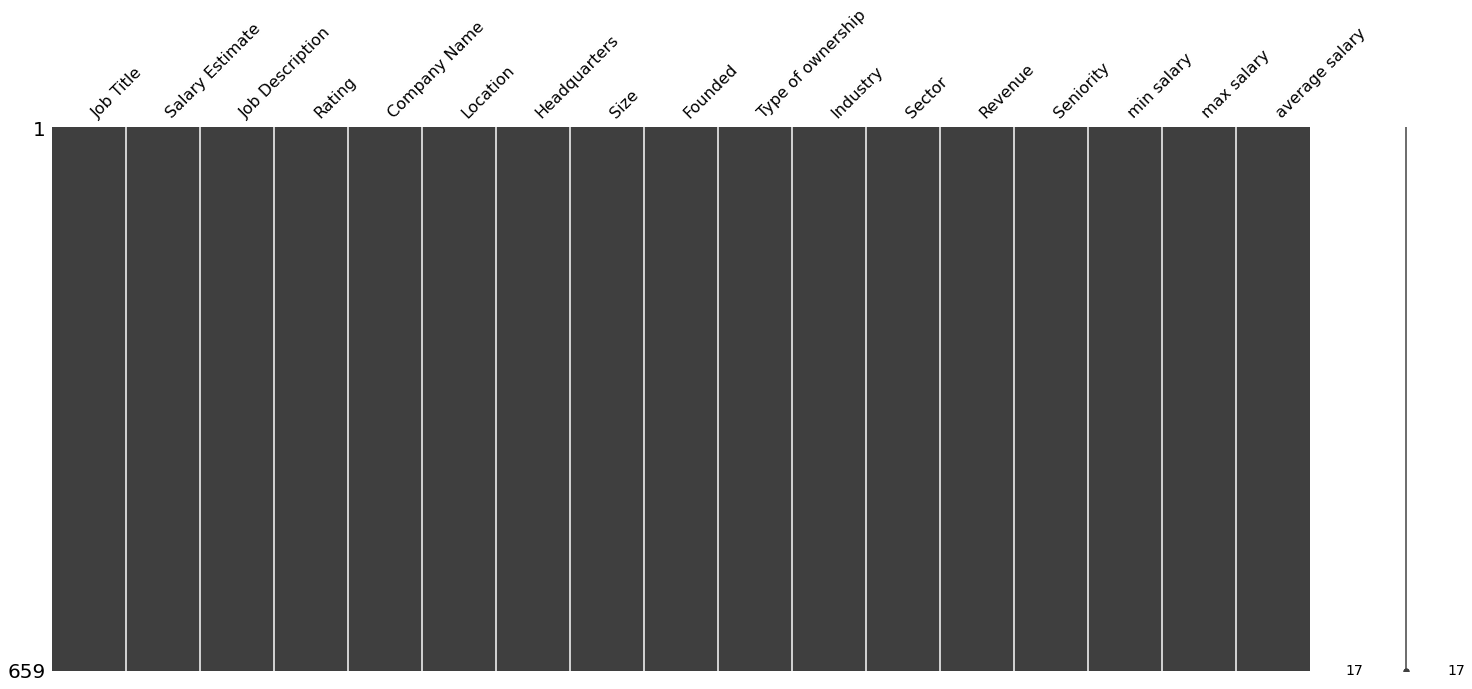

In [77]:
msno.matrix(df, color = (0.25,0.25,0.25))

In [71]:
 #Creating a seniority column
df['Seniority']=df['Job Title'].str.contains('Sr.|Senior|Sr')

In [74]:
# splitting salary estimate column into minimum and maximum salary
df[['min salary','max salary']]=df['Salary Estimate'].str.split('-',expand=True)

#converting the min and max salary to integers
df['min salary']=df['min salary'].str.replace('$','').str.replace('K','').astype('int')
df['max salary']=df['max salary'].str.replace('$','').str.replace('K','').astype('int')

C:\Users\EAFrimpong\AppData\Local\Temp\ipykernel_6468\854472024.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['min salary']=df['min salary'].str.replace('$','').str.replace('K','').astype('int')
C:\Users\EAFrimpong\AppData\Local\Temp\ipykernel_6468\854472024.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['max salary']=df['max salary'].str.replace('$','').str.replace('K','').astype('int')


In [76]:
# creating the average salary column
df['average salary']=(df['min salary']+df['max salary'])/2

In [78]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Seniority,min salary,max salary,average salary
0,Sr Data Scientist,$137K-$171K,Description The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1970,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,True,137,171,154.0
1,Data Scientist,$137K-$171K,"Secure our Nation, Ignite your Future Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1970,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),False,137,171,154.0
2,Data Scientist,$137K-$171K,Overview Analysis Group is one of the larges...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1970,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),False,137,171,154.0
3,Data Scientist,$137K-$171K,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,1970,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),False,137,171,154.0
4,Data Scientist,$137K-$171K,Data Scientist Affinity Solutions / Marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1970,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,False,137,171,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Data Scientist,$105K-$167K,Summary We’re looking for a data scientist to...,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1970,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,False,105,167,136.0
655,Data Scientist,$105K-$167K,Job Description Become a thought leader within...,3.9,JKGT,"San Francisco, CA","Santa Cruz, CA",Unknown,1970,Unknown,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,False,105,167,136.0
656,Data Scientist,$105K-$167K,Join a thriving company that is changing the w...,3.9,AccessHope,"Irwindale, CA","Santa Cruz, CA",Unknown,1970,Unknown,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,False,105,167,136.0
657,Data Scientist,$105K-$167K,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,1970,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),False,105,167,136.0
